In [1]:
import sys
sys.dont_write_bytecode = True
import numpy as np
from testing_suite import *
from parameters import *
from algorithm import *
import functions as fcn
import time
import matplotlib.pyplot as plt
import math
import itertools
import random as rand
import pandas as pd
import os
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

f = 1

In [2]:
# create dataframe containing all data to be evaluated

if False:
    master_df = None
    cnt = 1
    directory = "C:\\Users\\stijn Hennissen\\Jupyter Notebooks\\Nast Thesis\\Testing suite\\suit_result_files\\"

    for filename in os.listdir(directory)[:]:
        if filename.endswith(".csv"):
            file_df = pd.read_csv(directory+filename, index_col=0)
            if cnt == 1:
                master_df = file_df.tail(1).copy()
                master_df.index = [0]
            else:
                master_df = master_df.append(file_df.tail(1).copy(), ignore_index=True)
            master_df.reset_index()
            i = master_df.index[-1]
            m_timer_main = np.mean(np.array([l[1:-1].split() for l in file_df['timer_main']]).astype(float), axis=0)
            for j in range(0, m_timer_main.size):
                master_df.loc[i, 'timer_main_'+str(j+1)] = m_timer_main[j]
            master_df.loc[i, ['timer_iter', 'timerest_iter', 'delta_time']] = np.mean(np.array(file_df[['timer_iter', 'timerest_iter', 'delta_time']].values), axis=0)
            
            cnt += 1
    master_df.drop('timer_main', axis=1, inplace=True)
    master_df.to_csv('master_df.csv', index=False)


In [3]:
data = pd.read_csv("C:\\Users\\stijn Hennissen\\Jupyter Notebooks\\Nast Thesis\\Testing suite\\master_df.csv")
data.drop(data[data['min_score'] <= 0].index, inplace=True)
data.reset_index()
data.rename(columns={'timer_main_1': 'timer_selection', 'timer_main_2': 'timer_mutation', 'timer_main_3': 'timer_shuffle', 'timer_main_4': 'timer_crossover', 'timer_main_5': 'timer_fitness'}, inplace=True)

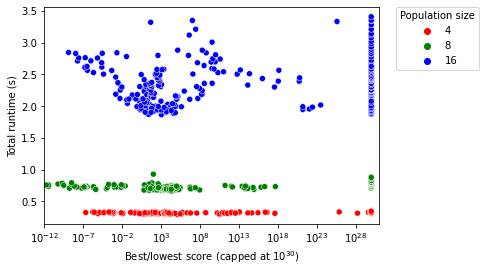

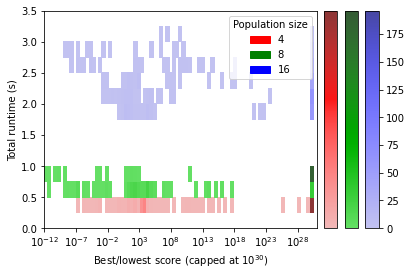

In [4]:
# Plot score against time
plt.figure(f)
g1 = sns.scatterplot(
    data = data,
    x = 'min_score',
    y = 'elapsed_time',
    hue = 'MP_population_size',
    palette = ['red', 'green', 'blue']
)
plt.xscale('log')
plt.xlim(1e-12,1e31)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Population size')
plt.xlabel('Best/lowest score (capped at $10^{30}$)')
plt.ylabel('Total runtime (s)')
plt.show()
f += 1

plt.figure(f)
g3 = sns.histplot(
    data = data.loc[data['min_score'] > 0],
    x = 'min_score',
    y = 'elapsed_time',
    hue = 'MP_population_size',
    palette = ['red', 'green', 'blue'],
    log_scale=[True, False],
    bins = [np.linspace(-12, 31, num=86), np.arange(0, 3.5, 0.25)],
)
plt.xlim(1e-12,1e31)
plt.ylim(0, 3.5)
g3.legend_.set_title('Population size')
divider = make_axes_locatable(g3)
divider_kwargs = dict(position="right", size="5%", pad=0.1)
cbar_3_1 = plt.colorbar(g3.collections[0], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_2 = plt.colorbar(g3.collections[1], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_3 = plt.colorbar(g3.collections[2], ax=g3, cax=divider.append_axes(**divider_kwargs))
cbar_3_2.set_ticks([])
cbar_3_1.set_ticks([])
g3.set(xlabel = 'Best/lowest score (capped at $10^{30}$)', ylabel = 'Total runtime (s)')
plt.show()
f += 1

<Figure size 432x288 with 0 Axes>

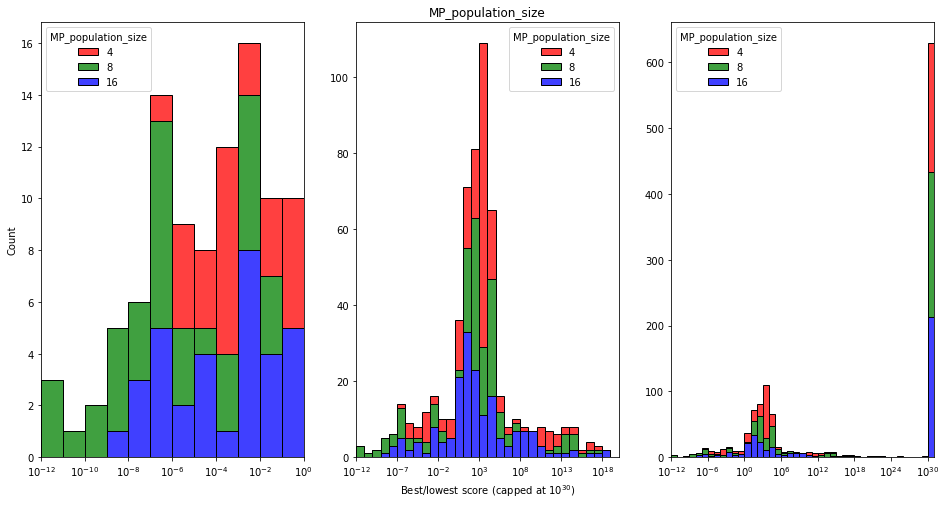

<Figure size 432x288 with 0 Axes>

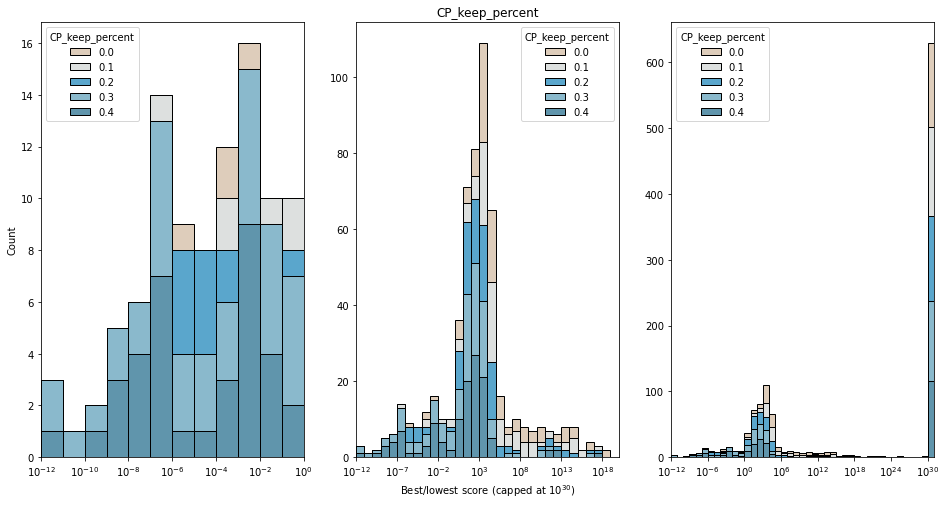

<Figure size 432x288 with 0 Axes>

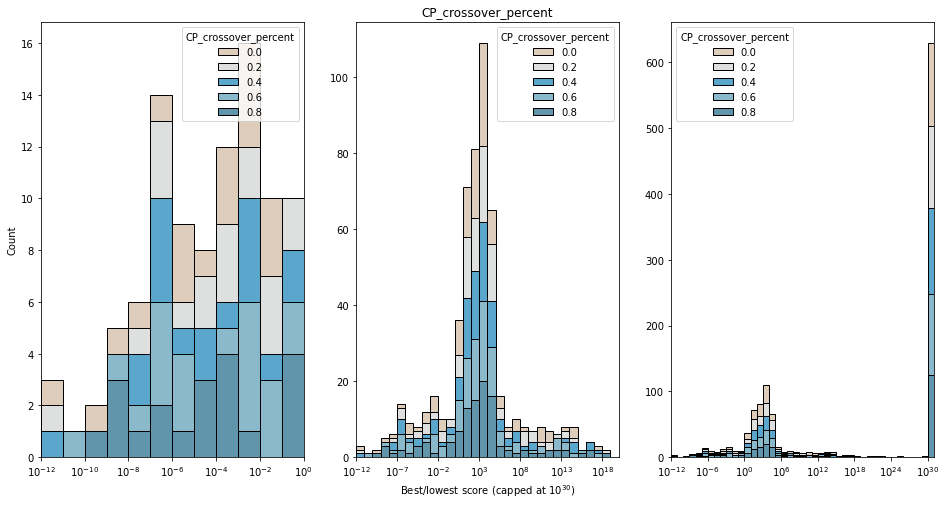

<Figure size 432x288 with 0 Axes>

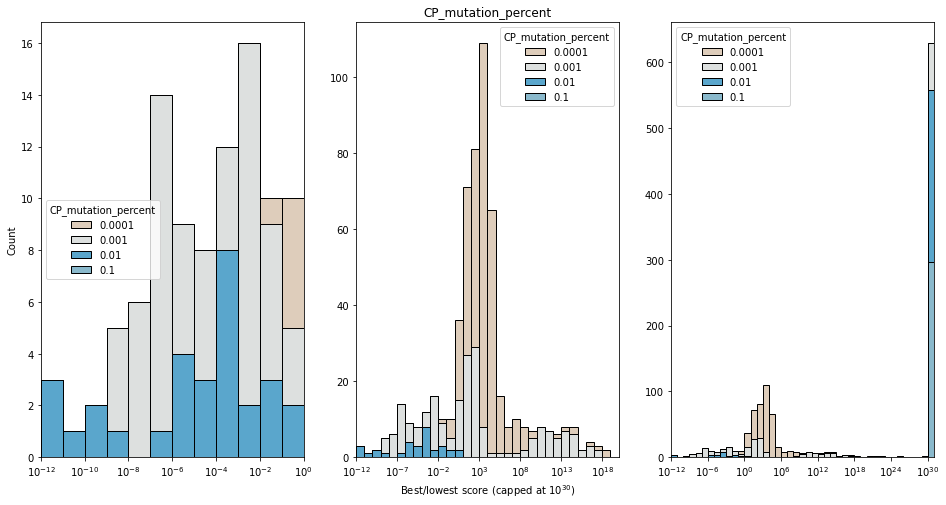

<Figure size 432x288 with 0 Axes>

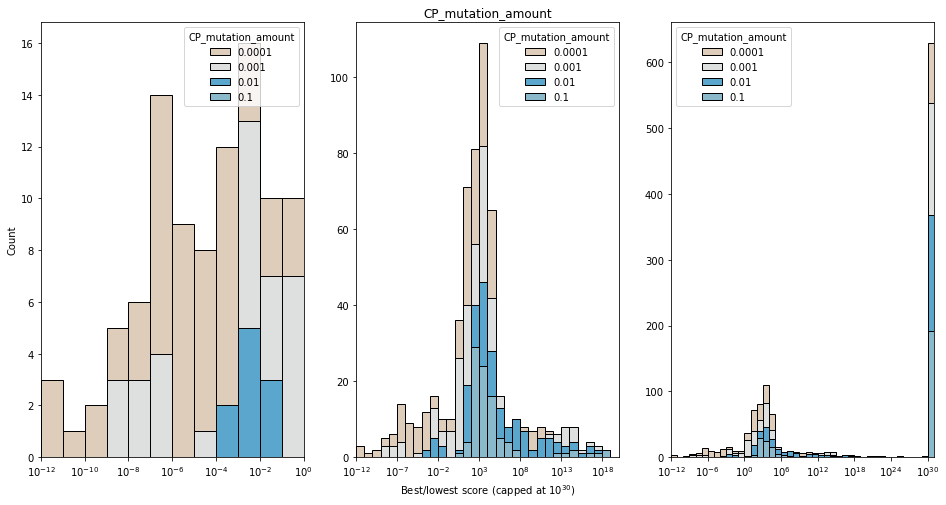

In [5]:
# Plot hists of scores

def plot_hist_scores(column, f, palette):
    plt.figure(f)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 8))

    g20 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 0, num=13),
        ax = axs[0],
        palette = palette
    )
    axs[0].set_xlim([1e-12,1])

    g21 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 20, num=33),
        ax = axs[1],
        palette = palette
    )
    axs[1].set_xlim([1e-12,1e20])

    g22 = sns.histplot(
        data = data.loc[data['min_score'] > 0],
        x = 'min_score',
        hue = column,
        log_scale = True,
        multiple = "stack",
        bins = np.linspace(-12, 31, num=44),
        ax = axs[2],
        palette = palette
    )
    axs[2].set_xlim([1e-12,1e31])

    axs[0].set_xlabel('')
    axs[1].set_xlabel('Best/lowest score (capped at $10^{30}$)')
    axs[2].set_xlabel('')
    axs[0].set_ylabel('Count')
    axs[1].set_ylabel('')
    axs[2].set_ylabel('')
    
    axs[1].set_title(column)
    plt.show()
    return f + 1

palette = ['#d3bda5', '#d2d6d5', '#2388bc', '#63a2bc', '#2b7291', '#0c6391', '#003e6c']
f = plot_hist_scores('MP_population_size', f, ['red', 'green', 'blue'])
f = plot_hist_scores('CP_keep_percent', f, palette[:5])
f = plot_hist_scores('CP_crossover_percent', f, palette[:5])
f = plot_hist_scores('CP_mutation_percent', f, palette[:4])
f = plot_hist_scores('CP_mutation_amount', f, palette[:4])

<Figure size 432x288 with 0 Axes>

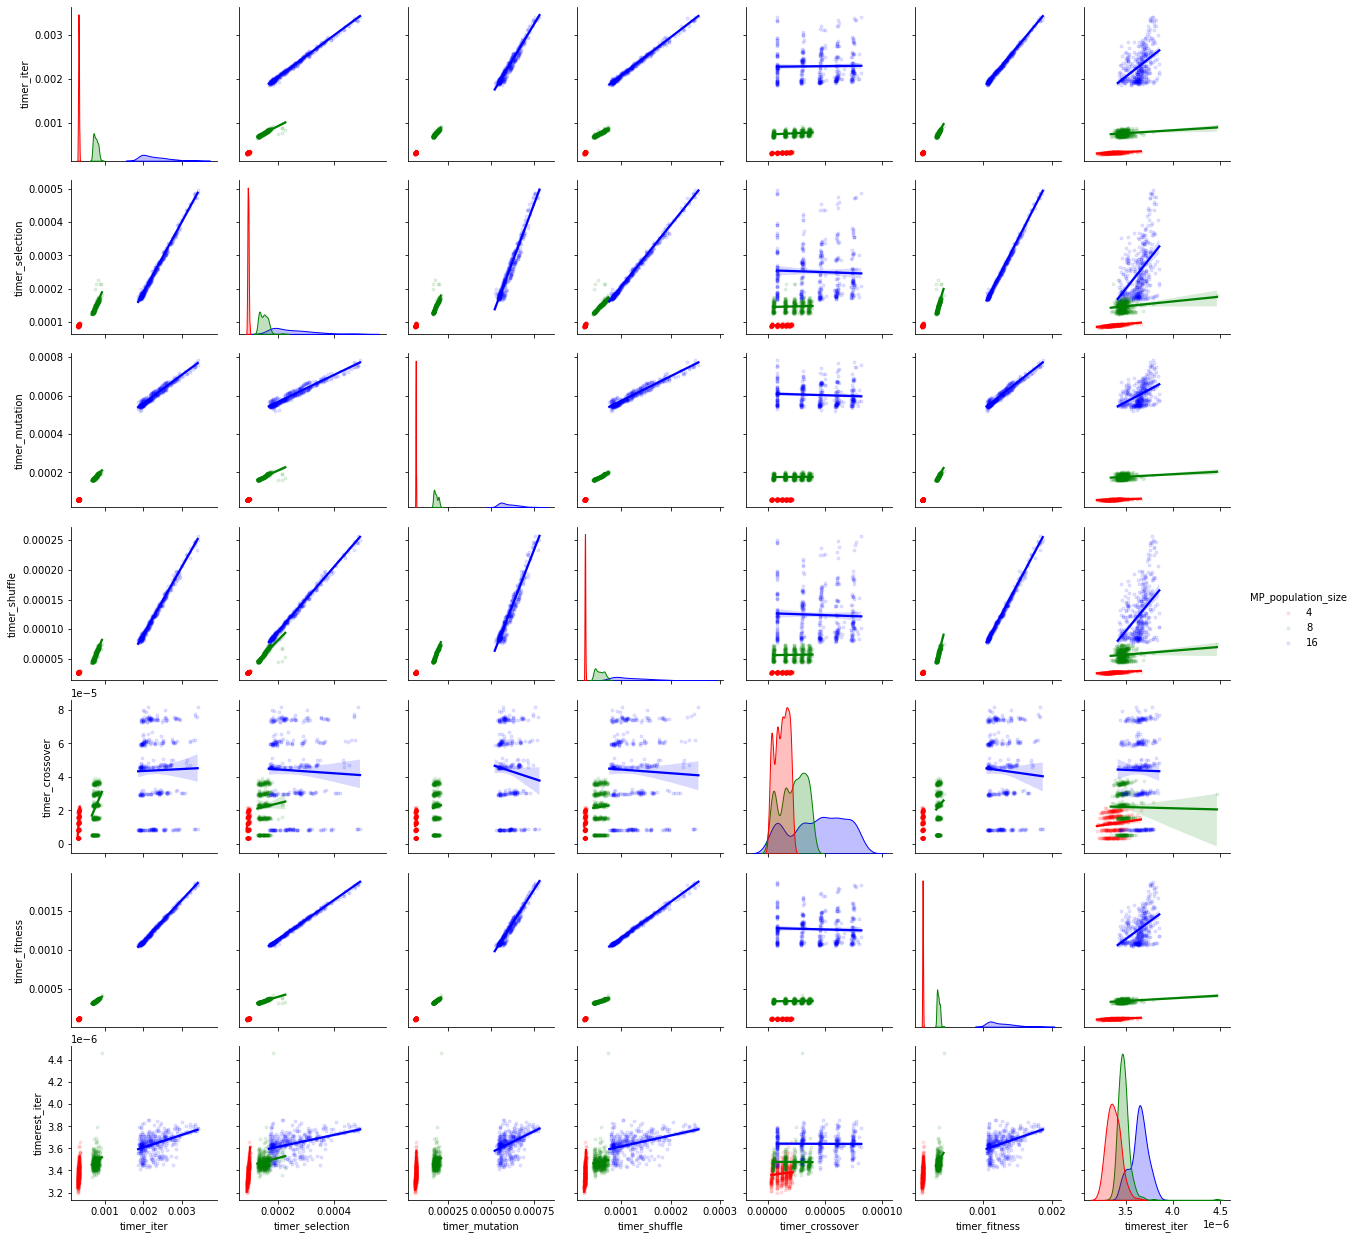

<Figure size 432x288 with 0 Axes>

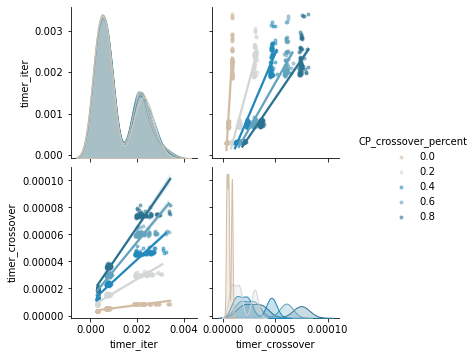

<Figure size 432x288 with 0 Axes>

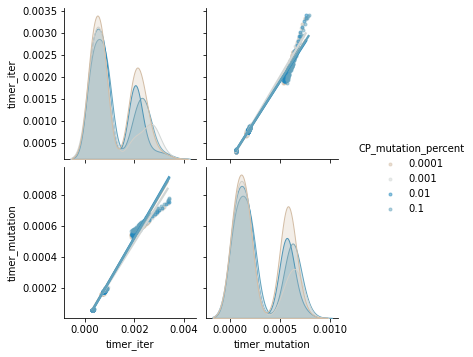

<Figure size 432x288 with 0 Axes>

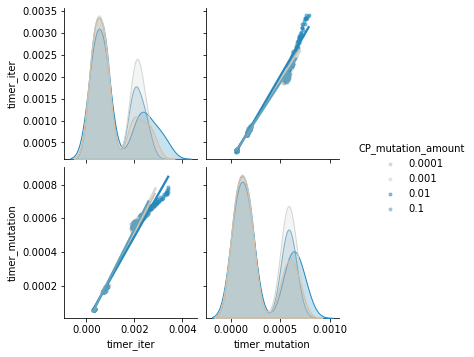

In [13]:
# Correlations

corr_columns1 = ['timer_iter', 'timer_selection', 'timer_mutation', 'timer_shuffle', 'timer_crossover', 'timer_fitness', 'timerest_iter', 'MP_population_size']
plt.figure()
sns.pairplot(data[corr_columns1], hue='MP_population_size', palette = ['red', 'green', 'blue'], kind='reg', markers='.', plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

corr_columns1 = ['timer_iter', 'timer_crossover', 'CP_crossover_percent']
plt.figure()
sns.pairplot(data[corr_columns1], hue='CP_crossover_percent', palette = palette[:5], kind='reg', markers='.', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

corr_columns1 = ['timer_iter', 'timer_mutation', 'CP_mutation_percent']
plt.figure()
sns.pairplot(data[corr_columns1], hue='CP_mutation_percent', palette = palette[:4], kind='reg', markers='.', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

corr_columns1 = ['timer_iter', 'timer_mutation', 'CP_mutation_amount']
plt.figure()
sns.pairplot(data[corr_columns1], hue='CP_mutation_amount', palette = palette[:4], kind='reg', markers='.', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

In [7]:
# Find Paretro optima

def find_pareto_optima_2d(data, c1, c2):
    pareto_df = pd.DataFrame(columns=data.columns)
    for i, row in data.iterrows():
        is_dominated = False
        is_duplicate = False
        for j, other_row in data.iterrows():
            if i == j:
                continue
            # Check if the other solution dominates the current solution
            if (other_row[c1] < row[c1] and other_row[c2] < row[c2]):
                # The other solution dominates the current solution and hence row cannot be added to pareto set.
                is_dominated = True
                break
            # Check if the other solution is a duplicate
            if (other_row[c1] == row[c1] and other_row[c2] == row[c2]):
                is_duplicate = True
                break

        if not is_dominated:
            # The current solution is Pareto-optimal
            row_df = pd.DataFrame([row])
            pareto_df = pd.concat([pareto_df, row_df], ignore_index=True).drop_duplicates()

    return pareto_df

pareto_front = find_pareto_optima_2d(data, 'min_score', 'elapsed_time')
pareto_front = pareto_front.sort_values(by='min_score')

print(pareto_front[['min_score', 'elapsed_time']])

       min_score  elapsed_time
11  1.818989e-12      0.757365
10  3.637979e-12      0.735218
9   1.731678e-09      0.706457
4   2.197889e-07      0.323009
3   3.357832e-06      0.321768
5   8.873621e-06      0.304175
2   5.199624e+00      0.300863
1   8.760346e+00      0.300604
0   4.336956e+02      0.300000
6   2.871474e+03      0.296424
7   2.910960e+03      0.295052
8   1.217424e+05      0.294927


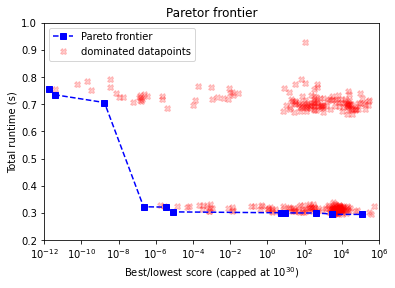

In [8]:
# plot pareto front

plt.figure(f)
plt.plot(
    pareto_front['min_score'].values,
    pareto_front['elapsed_time'].values,
    's--',
    c='b',
    label = 'Pareto frontier',
    zorder = 10
)
plt.plot(
    data['min_score'].values,
    data['elapsed_time'].values,
    'X',
    c='r',
    label = 'dominated datapoints',
    alpha = .2,
    zorder = 5
)
plt.xscale('log')
plt.xlim(1e-12, 1e6)
plt.ylim(0.2, 1)
plt.legend()
plt.xlabel('Best/lowest score (capped at $10^{30}$)')
plt.ylabel('Total runtime (s)')
plt.title('Paretor frontier')
plt.show()
f += 1

In [9]:
# Analyze generating function (this part is specific to this set of tests)

def generate_grid(fixed_point, collocation_point_numbers, collocation_point_bounds):
    n_p = collocation_point_numbers # u-, u+, v-, v+
    B_p = collocation_point_bounds # u-, u+, v-, v+
    fp = fixed_point # u, v

    um = np.linspace(fp[0]-B_p[0], fp[0], n_p[0]+1) # u- to u*
    up = np.linspace(fp[0], fp[0]+B_p[1], n_p[1]+1) # u* to u+
    vm = np.linspace(fp[1]-B_p[2], fp[1], n_p[2]+1) # v- to v*
    vp = np.linspace(fp[1], fp[1]+B_p[3], n_p[3]+1) # v* to v+

    u_mp, v_mp = np.meshgrid(um, vp, indexing='ij') # exclude none
    u_pp, v_pp = np.meshgrid(up[1:], vp, indexing='ij') # exclude u*
    u_mm, v_mm = np.meshgrid(um, vm[:-1], indexing='ij') # exclude v*
    u_pm, v_pm = np.meshgrid(up[1:], vm[:-1], indexing='ij') # exclude u* and v*

    u_vp = np.concatenate((u_mp, u_pp))
    v_vp = np.concatenate((v_mp, v_pp))
    u_vm = np.concatenate((u_mm, u_pm))
    v_vm = np.concatenate((v_mm, v_pm))

    u = np.concatenate((u_vm, u_vp), axis=1)
    v = np.concatenate((v_vm, v_vp), axis=1)
        
    grid = np.array([u,v], dtype=np.float32)

    points = np.transpose(np.vstack([u.ravel(order='F'), v.ravel(order='F')]))

    return points, grid, np.array([], dtype=np.float32)
    
    
def calculate_smoothness(collocation_point_numbers, collocation_point_bounds):
    return np.min(np.divide(collocation_point_bounds, collocation_point_numbers))
    
    
def precalculate_tensors(collocation_points, F_fp, psi, dpsi, beta, N_p, sigma, N):
    dpsi(collocation_points, N_p, sigma, N, np.transpose(collocation_points), collocation_points)
    return np.array([F_fp(cp) for cp in collocation_points], dtype=np.float32), psi(collocation_points, N_p, sigma, N, np.transpose(collocation_points)), dpsi(collocation_points, N_p, sigma, N, np.transpose(collocation_points), collocation_points), beta(collocation_points)
    

beta_functions = fcn.beta
fixed_point = np.array([343/(288*math.pi), -49/(288*math.pi)])
true_result = 0.15
linear_generating_function = fcn.F_fp
collocation_point_numbers = np.array([4,1,2,6])
collocation_point_bounds = np.array([.5,.3,.3,.5])
basis_functions = fcn.psi
basis_functions_derivatives = fcn.dpsi
N = 2

collocation_points, grid, core_ids = generate_grid(fixed_point, collocation_point_numbers, collocation_point_bounds)
            
N_p = collocation_points.shape[0]
            
smoothness = calculate_smoothness(collocation_point_numbers, collocation_point_bounds)
            
F_fp, pc_psi, dpsi, beta = precalculate_tensors(
                collocation_points, 
                linear_generating_function, 
                basis_functions, 
                basis_functions_derivatives, 
                beta_functions,
                N_p, 
                smoothness,
                N
)

# find fixed point id
fp_id = 0
for i in range(0, collocation_points.shape[0]):
    if collocation_points[i,0] == fixed_point[0] and collocation_points[i,1] == fixed_point[1]:
        fp_id = i
        break
        

=== id=11, min_score=1.8189894035458565e-12, elapsed_time=0.7573647000001529 ===


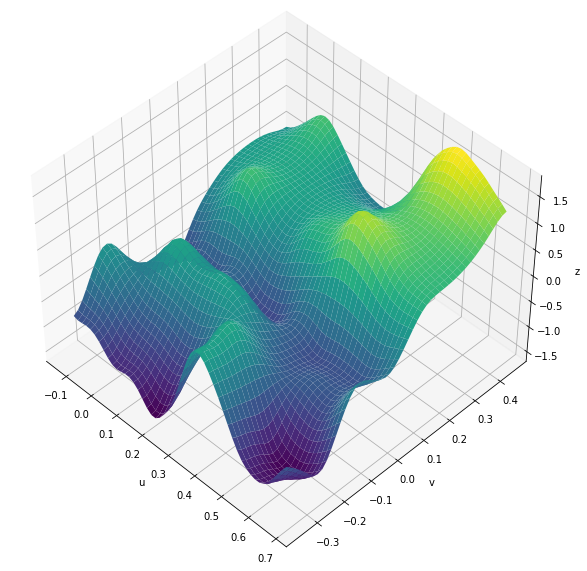

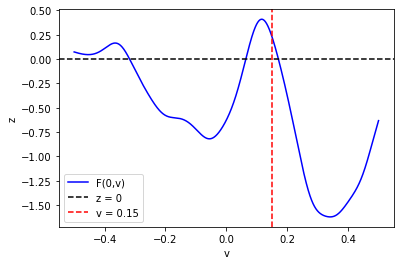

F(0,v)=0 at v=0.17093039303930394

=== id=10, min_score=3.637978807091713e-12, elapsed_time=0.7352175999999417 ===


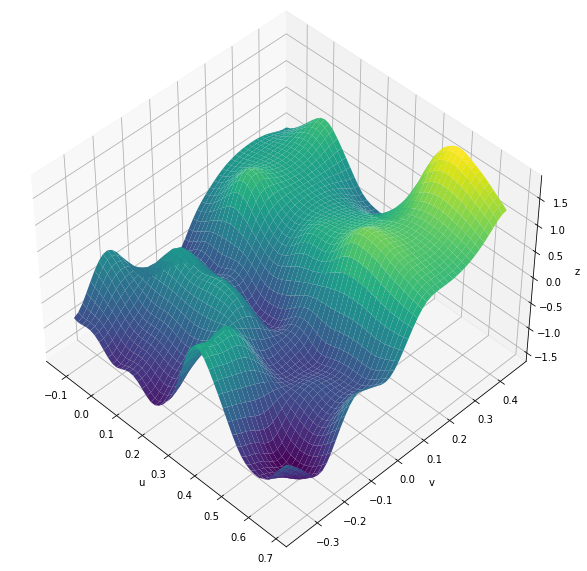

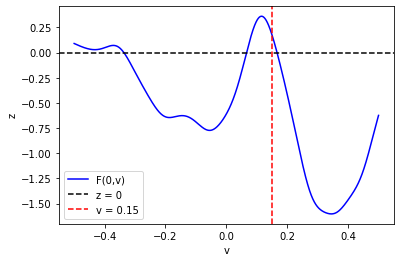

F(0,v)=0 at v=0.16655665566556654

=== id=9, min_score=1.731677912175655e-09, elapsed_time=0.7064565999999104 ===


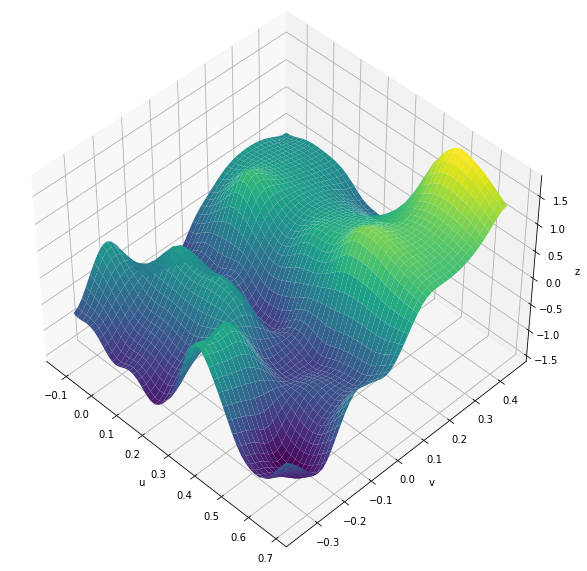

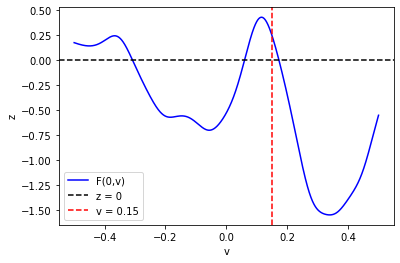

F(0,v)=0 at v=0.17296569656965696

=== id=4, min_score=2.1978894437779678e-07, elapsed_time=0.3230091000000357 ===


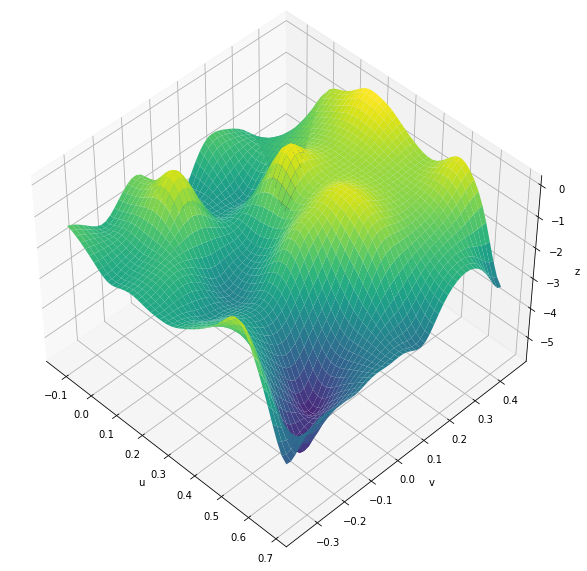

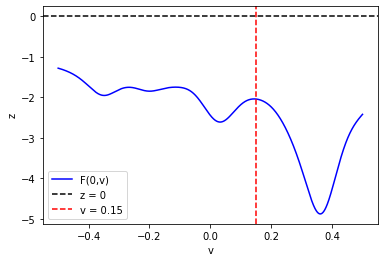

F(0,v)=0 at v=0.14373527352735274

=== id=3, min_score=3.3578321563254576e-06, elapsed_time=0.3217678999999975 ===


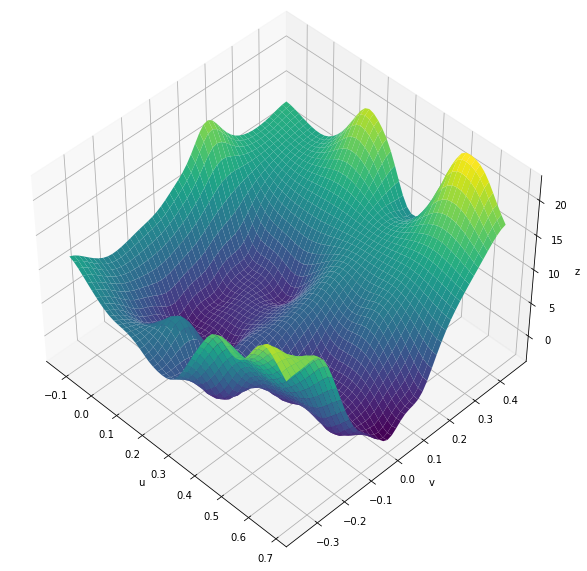

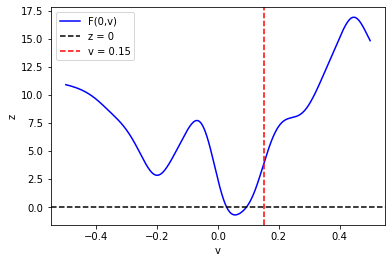

F(0,v)=0 at v=0.09354555455545555

=== id=5, min_score=8.87362148205284e-06, elapsed_time=0.3041748999999072 ===


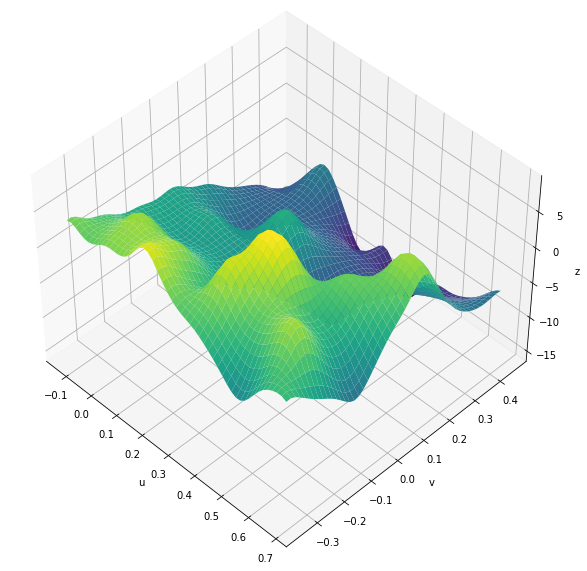

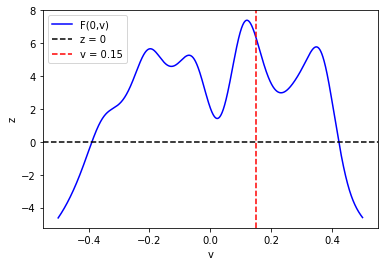

F(0,v)=0 at v=0.422008900890089

=== id=2, min_score=5.199624061584473, elapsed_time=0.3008634000000256 ===


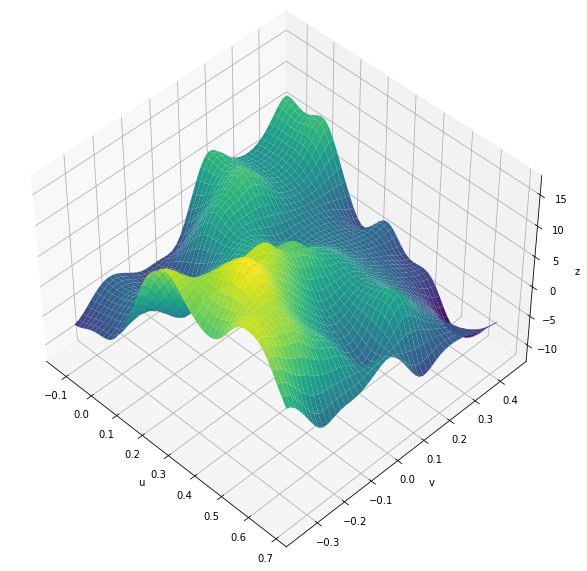

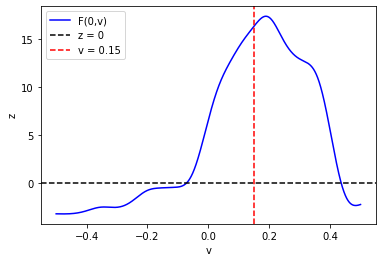

F(0,v)=0 at v=0.43647254725472545

=== id=1, min_score=8.760346412658691, elapsed_time=0.3006043000000318 ===


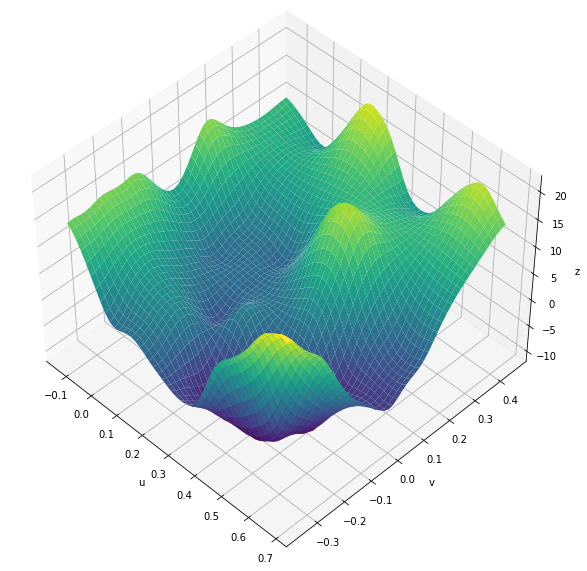

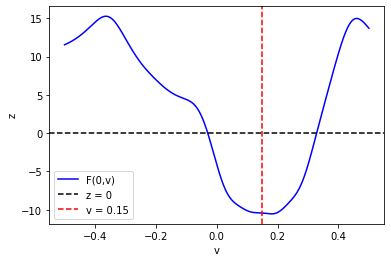

F(0,v)=0 at v=0.3282983298329833

=== id=0, min_score=433.6956481933594, elapsed_time=0.2999997000000007 ===


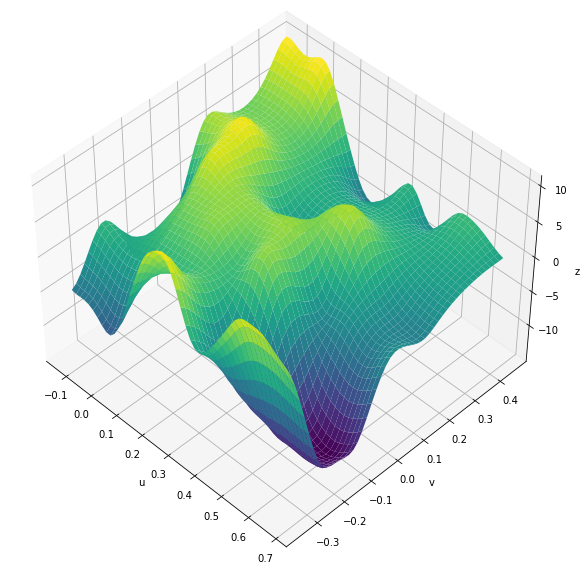

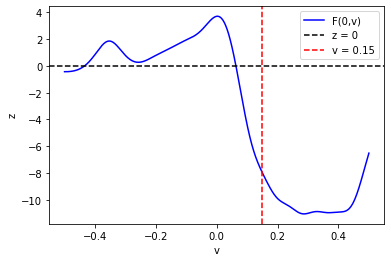

F(0,v)=0 at v=0.067

=== id=6, min_score=2871.47412109375, elapsed_time=0.2964237999999994 ===


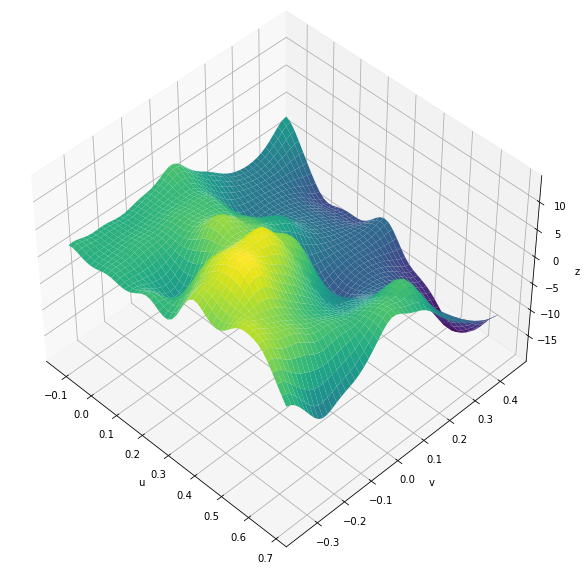

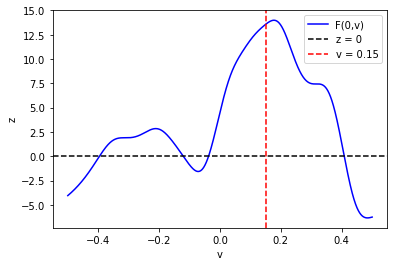

F(0,v)=0 at v=0.40832473247324735

=== id=7, min_score=2910.96044921875, elapsed_time=0.2950523000000089 ===


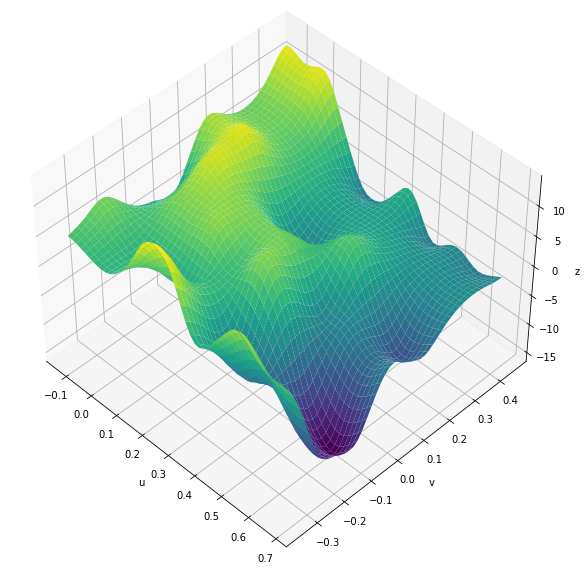

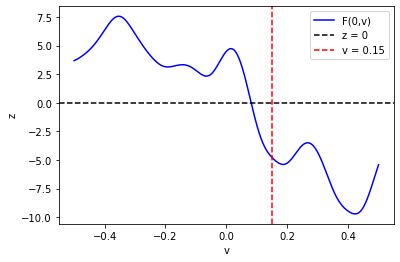

F(0,v)=0 at v=0.0815935593559356

=== id=8, min_score=121742.40625, elapsed_time=0.2949265999999966 ===


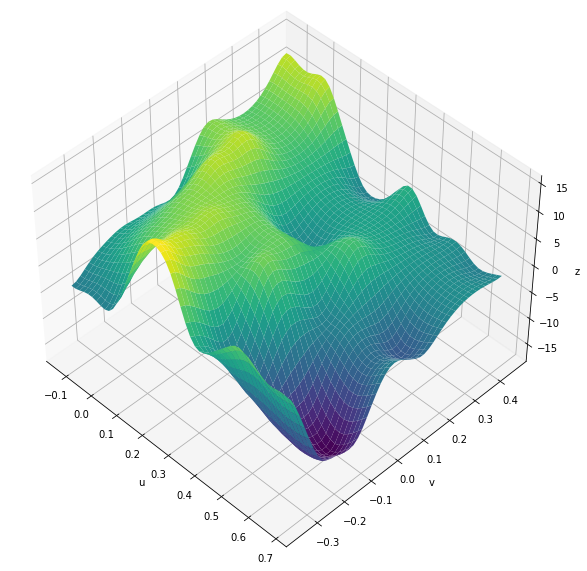

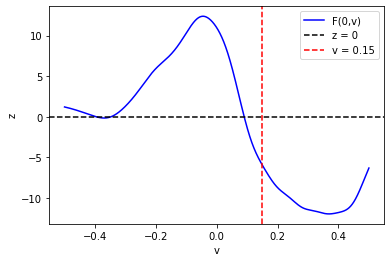

F(0,v)=0 at v=0.09025442544254425



In [10]:

def get_p_from_df(i):
    p_temp = pareto_front.loc[i, 'best_p'].split(']\n [')
    p_temp[0] = p_temp[0][1:]
    p_temp[-1] = p_temp[-1][:-1]
    p_temp = [l[1:-1].replace('\n','').split() for l in p_temp]
    p_temp = np.array(p_temp, dtype=float)
    return np.array([p_temp.transpose()[-1]]).transpose()

def plot_F(p, res):
    x = np.linspace(fixed_point[0]-collocation_point_bounds[0], fixed_point[0]+collocation_point_bounds[1], res)
    y = np.linspace(fixed_point[1]-collocation_point_bounds[2], fixed_point[1]+collocation_point_bounds[3], res)

    X, Y = np.meshgrid(x, y)
    G = np.transpose(np.vstack([X.ravel(order='F'), Y.ravel(order='F')]))
    Z = np.reshape(fcn.F_general(G, p, pc_psi, fp_id, N_p, smoothness, N, np.transpose(collocation_points))[:,0], (res, res))

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    ax.view_init(45, -45)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    plt.show()
    
def plot_F_slice(bound, number, p, pc_psi, fp_id, fp, N_cp, sigma, N, CP_transpose, true_result):
    check_coords = np.zeros((number,2))
    check_coords[:,1] = np.linspace(bound[0], bound[1], number)
    x = check_coords[:,1]
    y = fcn.F_general(check_coords,p,pc_psi,fp_id, N_cp, sigma, N, CP_transpose)
    plt.figure()
    plt.plot(x, y, c='b', label='F(0,v)')
    plt.axhline(0, ls='--', c='k', label='z = 0')
    plt.axvline(true_result, ls='--', c='r', label=f'v = {true_result}')
    plt.xlabel('v')
    plt.ylabel('z')
    plt.legend()
    plt.show()
    return x, y

x_list = []
y_list = []
v_list = []

for i in pareto_front.index.to_list():
    print(f"=== id={i}, min_score={pareto_front.loc[i, 'min_score']}, elapsed_time={pareto_front.loc[i, 'elapsed_time']} ===")
    p = get_p_from_df(i) 
    plot_F(p, 50)
    x, y = plot_F_slice([-0.5,0.5], 10000, p, pc_psi, fp_id, fixed_point, N_p, smoothness, N, np.transpose(collocation_points), true_result)
    x_list.append(x)
    y_list.append(y)
    v_loc = fcn.findSolutionV2D([0.067,0.5], 10000, p, pc_psi, fp_id, fixed_point, N_p, smoothness, N, np.transpose(collocation_points))
    v_list.append(v_loc)
    print(f"F(0,v)=0 at v={v_loc}")
    print()

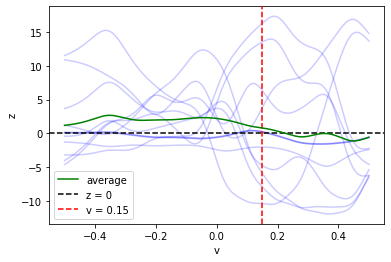

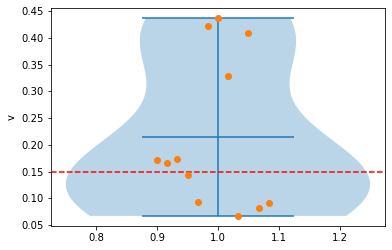

In [11]:
# plot concluding results

plt.figure()
mean_line = np.zeros(len(x_list[0]))
for i in range(0, len(x_list)):
    plt.plot(x_list[i], y_list[i], c='b', alpha=.2, zorder=5)
    mean_line = np.add(mean_line, np.array(y_list[i])[:,0])
    
mean_line = mean_line/len(x_list)
plt.plot(x_list[0], mean_line, c='g', zorder=15, label='average')
plt.axhline(0, ls='--', c='k', label='z = 0', zorder=10)
plt.axvline(true_result, ls='--', c='r', label=f'v = {true_result}', zorder=11)
plt.xlabel('v')
plt.ylabel('z')
plt.legend()
plt.show()

plt.figure()
plt.violinplot(v_list,showmeans=True,showmedians=False)
plt.plot(0.2*np.arange(0, len(v_list))/len(v_list)+0.9, v_list, 'o', zorder=15)
plt.ylabel('v')
plt.ylim=(0,0.5)
plt.axhline(true_result, ls='--', c='r', zorder=10)
plt.show()